# create a family of benchmark graphs
https://networkx.org/documentation/stable/reference/generated/networkx.generators.community.LFR_benchmark_graph.html
“Benchmark graphs for testing community detection algorithms”, Andrea Lancichinetti, Santo Fortunato, and Filippo Radicchi, Phys. Rev. E 78, 046110 2008

In [5]:
import networkx as nx
import numpy as np
#import pandas as pd
import igraph 
import itertools
 

In [46]:
#https://github.com/networkx/networkx/blob/a63c8bd3873fc7885726215248c7fe17e9cefd4c/networkx/generators/community.py#L381

def ring_of_cliques(num_cliques, clique_size, center = False, bridge = False):
    """Defines a "ring of cliques" graph.

    A ring of cliques graph is consisting of cliques, connected through single
    links. Each clique is a complete graph.

    Parameters
    ----------
    num_cliques : int
        Number of cliques
    clique_size : int
        Size of cliques

    Returns
    -------
    G : NetworkX Graph
        ring of cliques graph

    Raises
    ------
    NetworkXError
        If the number of cliques is lower than 2 or
        if the size of cliques is smaller than 2.

    Examples
    --------
    >>> G = nx.ring_of_cliques(8, 4)

    See Also
    --------
    connected_caveman_graph

    Notes
    -----
    The `connected_caveman_graph` graph removes a link from each clique to
    connect it with the next clique. Instead, the `ring_of_cliques` graph
    simply adds the link without removing any link from the cliques.
    """
    if num_cliques < 3:
        raise nx.NetworkXError("A ring of cliques must have at least 3 cliques")
    if clique_size < 3:
        raise nx.NetworkXError("The cliques must have at least 3 nodes")
    
    center_id = clique_size * num_cliques
    if bridge == True: bridge_id = center_id + 1 
     
    G = nx.Graph()
    for i in range(0, num_cliques):
        start = (i * clique_size) 
        end = start + clique_size 
        edges =     .combinations(range(start ,  end ), 2)
        G.add_edges_from(edges)
        
        bridge_start = start + 1
        bridge_end = (i + 1) * clique_size % (num_cliques * clique_size)
        
        print(i , start, end, center_id, bridge_id )
        if bridge == False:     
            G.add_edge(bridge_start,  bridge_end)
            
        else:
            G.add_edge(bridge_start,  bridge_id + i )
            G.add_edge(bridge_id + i,  bridge_end)
            
                   
        if center: G.add_edge(start + 2, center_id)

       #ADD LABELS!!
       
    return G

In [7]:
#calculate the empirical mu

In [92]:
def make_ring_of_cliques(num_cliques,clique_size, center = False, bridge = False):
    #networkx
    g = ring_of_cliques(num_cliques=num_cliques, clique_size=clique_size, center = center, bridge = bridge)
    filename = f"./ring_of_cliques_{num_cliques}_{clique_size}.gml"
    nx.write_gml(g, filename)
    # returns the igraph format
    gg = igraph.read(filename)
    labels = []
    for l in range(num_cliques):
        for _ in range(clique_size):
            labels.append(l)
    for i in range( (num_cliques*clique_size)+1, len(gg.vs['id'])):
        l +=1
        labels.append(l)
    # with labels
    gg.vs['label'] = labels
    print(gg.vs['id']) 
    print(labels)
    
    return(gg)

0 0 6 24 25
1 6 12 24 25
2 12 18 24 25
3 18 24 24 25
[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0]
[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 4, 5, 6, 7]


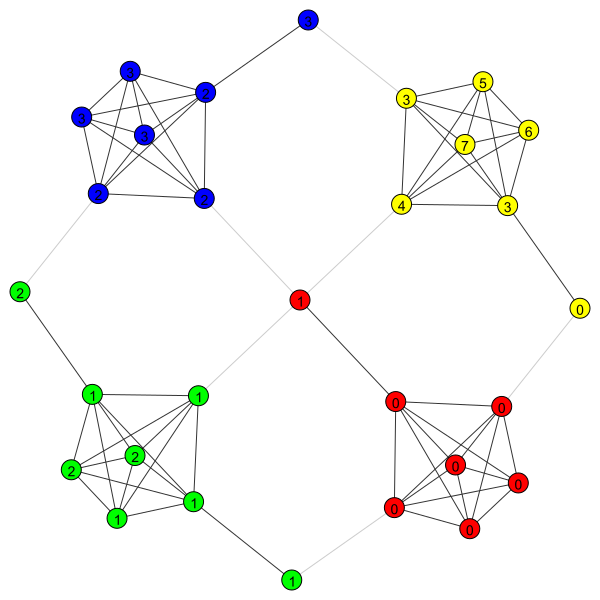

In [93]:
gg = make_ring_of_cliques(num_cliques=4, clique_size=6, center = True, bridge = True)
comms = gg.community_multilevel()
igraph.plot(comms, labels = gg.vs['id'])

In [49]:
gg.nodelist()

AttributeError: 'Graph' object has no attribute 'nodelist'

0 0 5 15 16
1 5 10 15 16
2 10 15 15 16


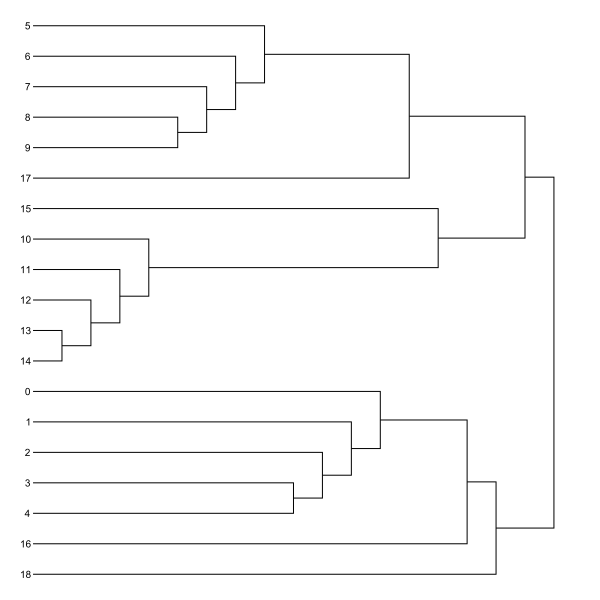

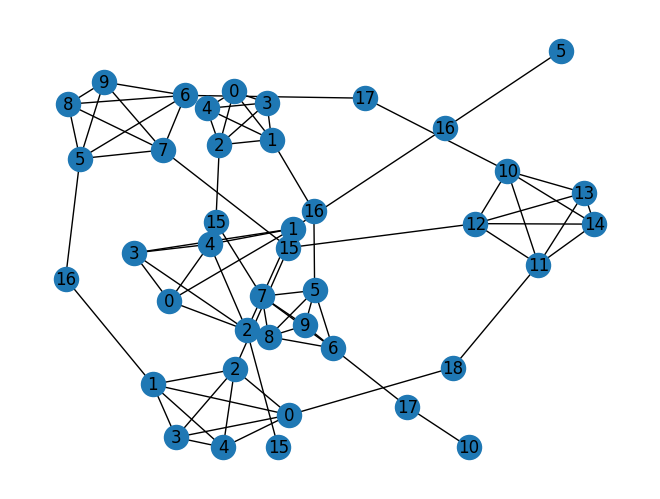

In [29]:
gg = make_ring_of_cliques(num_cliques=3, clique_size=5, center = True, bridge = True)
comms = gg.community_edge_betweenness()
igraph.plot(comms, mark_groups = True)

0 0 5 20 21
1 5 10 20 21
2 10 15 20 21
3 15 20 20 21


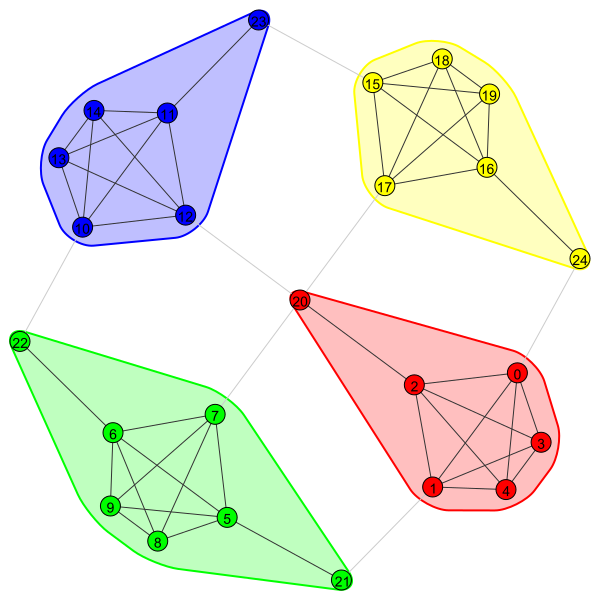

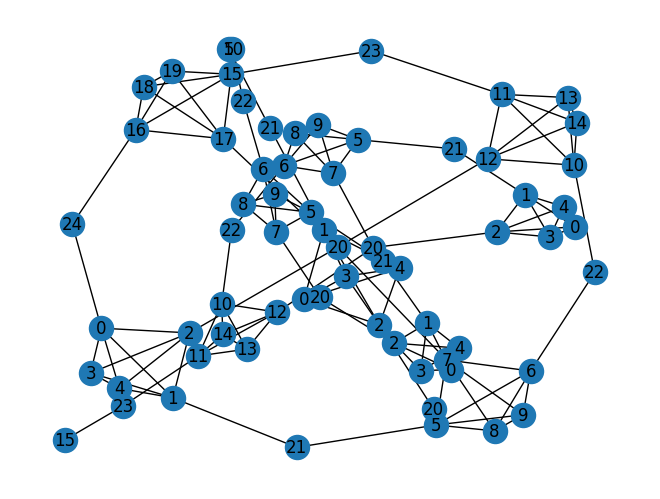

In [44]:
gg = make_ring_of_cliques(num_cliques=4, clique_size=5, center = True, bridge = True)
comms = gg.community_multilevel(resolution=0.6)
igraph.plot(comms, mark_groups = True)

In [12]:
#calculate empirical MU
# mu = 0
# for i in range(0,len(comms)):
#     members = comms[i]
#     print(i, members)
    
# c_size = [len(c) for c in comms]
# print("Community size", c_size)

In [13]:
import pandas as pd
n_comms = []
where_is_center = []
where_is_bridge = []

c_size = []
for i in range(10000):
    comms = gg.community_multilevel(resolution = 1.1)
    c_size = [len(c) for c in comms]
    n_comms.append(len(c_size))
    
    if len(c_size) == 5: c5 = comms # save the unusual configuration

        
    
#    where_is_center.append(np.array(c_size).argmax())
#    where is bridge ...

size_table = pd.Series(n_comms).value_counts() / len(n_comms)
print(size_table)
 
    

4    0.8624
5    0.1376
Name: count, dtype: float64


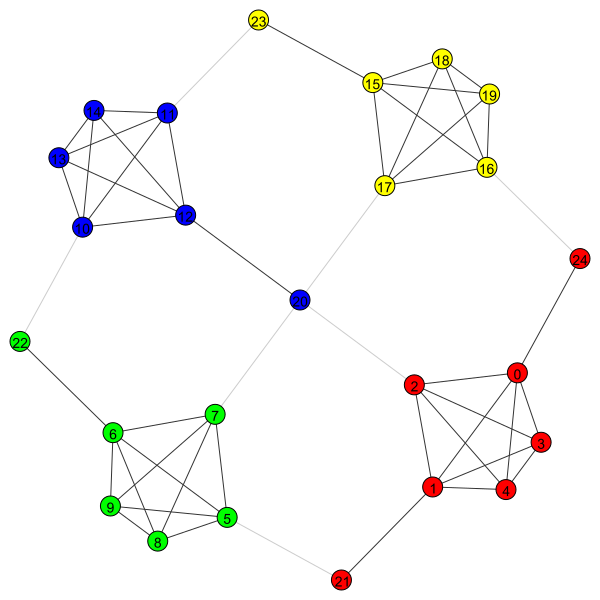

In [14]:
igraph.plot(comms)

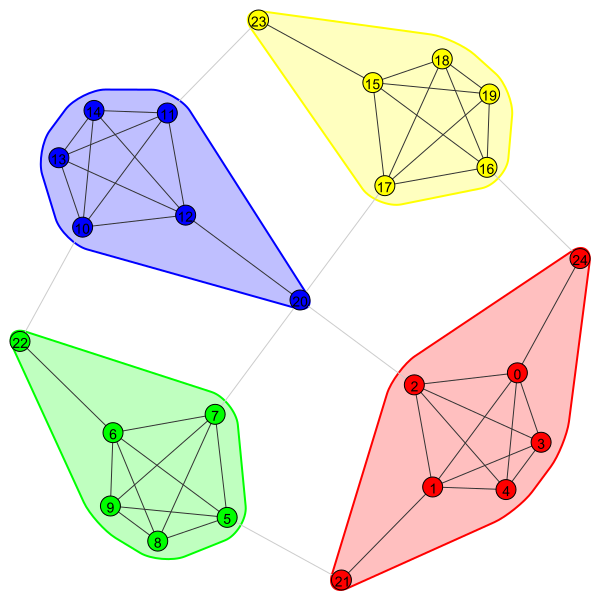

In [15]:
igraph.plot(comms, mark_groups = True)

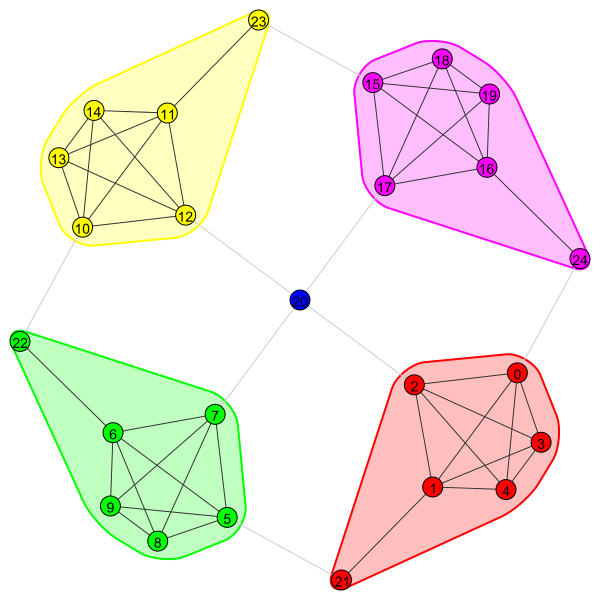

In [16]:
igraph.plot(c5, mark_groups = True)

In [17]:
g = gg
dataset = []
for c in range( len(comms)):
    print(c)
    for vertex in g.vs[ g.vs['label'] == 18]:
         print(vertex)

 

0


TypeError: 'igraph.Vertex' object is not iterable

In [ ]:
# given list
given_list = [1, 2, 3]

# extract ids and labels
ids = []
labels = []
for v in given_list:
    ids.append(v)
    labels.append(g.vs[v]["label"])

print("IDs:", ids)
print("Labels:", labels)

In [ ]:
 g.vs['label']